In [5]:
# Homework exercises for Week #3
# Task 1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
# # read in the data and print it
df = pd.read_csv('response.csv', delimiter = ",")
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3
1,2,Greek,Yes,No,10,17,4.0,6
2,3,Latin,No,Yes,5,20,54.0,9
3,4,Greek,Yes,Yes,3,20,11.0,4
4,5,Latin,Yes,Yes,1,20,5.0,8
5,6,Greek,Yes,Yes,3,20,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8
8,9,Latin,Yes,Yes,10,20,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,idn’t do the sudoku but the instructions seem ...


In [6]:
# See data types of each column of the data frame (object is string)
df.dtypes

Unnamed: 0      int64
type           object
exp            object
cor            object
diff            int64
hour            int64
sec           float64
min            object
dtype: object

In [8]:
# # change min from string to numeric
df['min'] = pd.to_numeric(df['min'], errors = 'coerce')
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3.0
1,2,Greek,Yes,No,10,17,4.0,6.0
2,3,Latin,No,Yes,5,20,54.0,9.0
3,4,Greek,Yes,Yes,3,20,11.0,4.0
4,5,Latin,Yes,Yes,1,20,5.0,8.0
5,6,Greek,Yes,Yes,3,20,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8.0
8,9,Latin,Yes,Yes,10,20,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,NaN


In [9]:
# make a time variable
df['time'] = df['min']*60 + df.sec
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3.0,248.0
1,2,Greek,Yes,No,10,17,4.0,6.0,364.0
2,3,Latin,No,Yes,5,20,54.0,9.0,594.0
3,4,Greek,Yes,Yes,3,20,11.0,4.0,251.0
4,5,Latin,Yes,Yes,1,20,5.0,8.0,485.0
5,6,Greek,Yes,Yes,3,20,NaN,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8.0,489.0
8,9,Latin,Yes,Yes,10,20,NaN,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,NaN,NaN


In [8]:
df[0:4]

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
0,1,Latin,"Yes, No","Yes, No",5,17,68.0,3.0,248.0
1,2,Greek,Yes,No,10,17,4.0,6.0,364.0
2,3,Latin,No,Yes,5,20,54.0,9.0,594.0
3,4,Greek,Yes,Yes,3,20,11.0,4.0,251.0


In [10]:
# Summary statistics can help us understand the data (and also clean it)
df.describe() # returns for numerical values

,Unnamed: 0,diff,hour,sec,min,time
count,10.00000,10.000000,10.000000,6.000000,6.000000,6.000000
mean,5.50000,6.000000,19.400000,25.166667,6.333333,405.166667
std,3.02765,3.231787,1.264911,28.223513,2.422120,140.870745
min,1.00000,1.000000,17.000000,4.000000,3.000000,248.000000
25%,3.25000,3.500000,20.000000,6.000000,4.500000,279.250000
50%,5.50000,5.500000,20.000000,10.000000,7.000000,424.500000
75%,7.75000,9.250000,20.000000,43.250000,8.000000,488.000000
max,10.00000,10.000000,20.000000,68.000000,9.000000,594.000000


In [12]:
df.describe(include = 'all')  # to overview all type entries

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
count,10.00000,10,10,10,10.000000,10.000000,6.000000,6.000000,6.000000
unique,NaN,2,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Latin,Yes,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,7,6,NaN,NaN,NaN,NaN,NaN
mean,5.50000,NaN,NaN,NaN,6.000000,19.400000,25.166667,6.333333,405.166667
std,3.02765,NaN,NaN,NaN,3.231787,1.264911,28.223513,2.422120,140.870745
min,1.00000,NaN,NaN,NaN,1.000000,17.000000,4.000000,3.000000,248.000000
25%,3.25000,NaN,NaN,NaN,3.500000,20.000000,6.000000,4.500000,279.250000
50%,5.50000,NaN,NaN,NaN,5.500000,20.000000,10.000000,7.000000,424.500000
75%,7.75000,NaN,NaN,NaN,9.250000,20.000000,43.250000,8.000000,488.000000


In [14]:
df.shape # gets number of columns and rows

(10, 9)

In [13]:
df['exp'].value_counts()  # get counts for categorical data

Yes        7
No         2
Yes, No    1
Name: exp, dtype: int64

In [15]:
# Data cleaning
# criterias: seconds should be in [0,60],
# - only one option should be ticked in 'Experience',
# -there should be no missing values,
# - there should be no extreme values (outliers)

df.loc[df['exp'] == 'No']
df.loc[df['exp'] != 'No']
df.loc[df['exp'].isin(['Yes','No'])]
df.loc[~df['exp'].isin(['Yes','No'])]

df['exp'].loc[~df['exp'].isin(['Yes','No'])] = np.nan  # only one option should be ticked in 'Experience',
df.loc[~df['exp'].isin(['Yes','No']),'exp'] = np.nan

C:\Users\gebre\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
0,1,Latin,NaN,"Yes, No",5,17,68.0,3.0,248.0
1,2,Greek,Yes,No,10,17,4.0,6.0,364.0
2,3,Latin,No,Yes,5,20,54.0,9.0,594.0
3,4,Greek,Yes,Yes,3,20,11.0,4.0,251.0
4,5,Latin,Yes,Yes,1,20,5.0,8.0,485.0
5,6,Greek,Yes,Yes,3,20,NaN,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8.0,489.0
8,9,Latin,Yes,Yes,10,20,NaN,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,NaN,NaN


In [79]:
# cor type should be either yes or no
# line 1 need to be fixed
df.loc[df['cor'] == 'No']
df.loc[df['cor'] != 'No']
df.loc[df['cor'].isin(['Yes','No'])]
df.loc[~df['cor'].isin(['Yes','No'])]

df['cor'].loc[~df['cor'].isin(['Yes','No'])] = np.nan  # if value is not Yes or No change it to NaN value
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min
0,1,Latin,NaN,NaN,5,17,68.0,3
1,2,Greek,Yes,No,10,17,4.0,6
2,3,Latin,No,Yes,5,20,54.0,9
3,4,Greek,Yes,Yes,3,20,11.0,4
4,5,Latin,Yes,Yes,1,20,5.0,8
5,6,Greek,Yes,Yes,3,20,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8
8,9,Latin,Yes,Yes,10,20,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,idn’t do the sudoku but the instructions seem ...


In [83]:
df.loc[df['sec'] > 60]
df.loc[df['sec'] > 60,'sec'] = np.nan  # criterias: seconds should be in [0,60] else change value to NaN
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min
0,1,Latin,NaN,NaN,5,17,NaN,3
1,2,Greek,Yes,No,10,17,4.0,6
2,3,Latin,No,Yes,5,20,54.0,9
3,4,Greek,Yes,Yes,3,20,11.0,4
4,5,Latin,Yes,Yes,1,20,5.0,8
5,6,Greek,Yes,Yes,3,20,NaN,NaN
6,7,Latin,Yes,No,10,20,NaN,NaN
7,8,Greek,No,No,7,20,9.0,8
8,9,Latin,Yes,Yes,10,20,NaN,NaN
9,10,Latin,Yes,Yes,6,20,NaN,idn’t do the sudoku but the instructions seem ...


In [25]:
# -there should be no missing values,
df = df.dropna()  # value with NaN should be removed
df

,Unnamed: 0,type,exp,cor,diff,hour,sec,min,time
1,2,Greek,Yes,No,10,17,4.0,6.0,364.0
2,3,Latin,No,Yes,5,20,54.0,9.0,594.0
3,4,Greek,Yes,Yes,3,20,11.0,4.0,251.0
4,5,Latin,Yes,Yes,1,20,5.0,8.0,485.0
7,8,Greek,No,No,7,20,9.0,8.0,489.0


<AxesSubplot:ylabel='Density'>

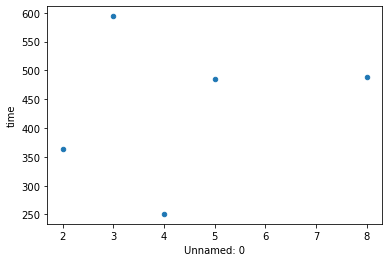

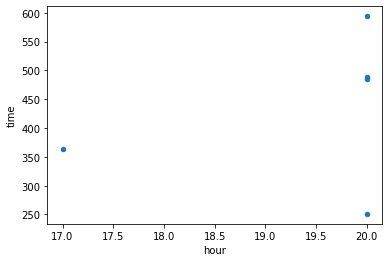

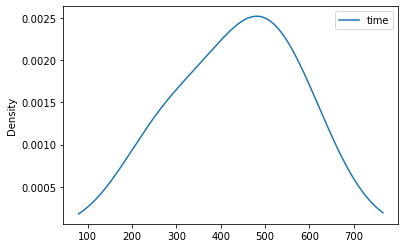

In [20]:
# Visualization of data can help us understand it
# numeric data
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(x = 'Unnamed: 0', y = 'time', kind = 'scatter') # scatter plot 
df.plot(x = 'hour', y = 'time', kind = 'scatter')
df.plot(y = 'time', kind = 'density') # density plot

<AxesSubplot:>

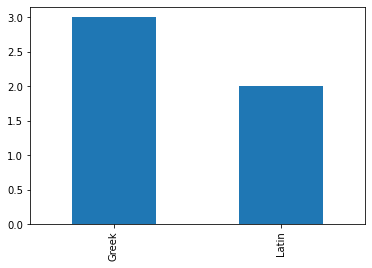

In [27]:
df['type'].value_counts().plot(kind='bar')

array([<AxesSubplot:title={'center':'Greek'}>,
       <AxesSubplot:title={'center':'Latin'}>], dtype=object)

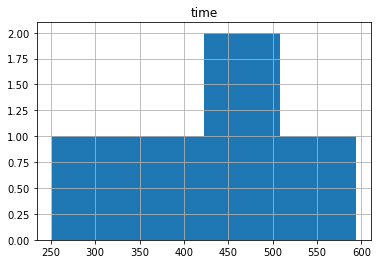

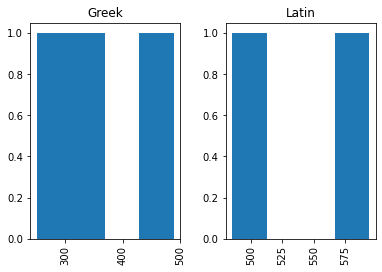

In [22]:
df.hist(column = 'time', bins = 4)
df.hist(column = 'time', bins = 4, by = 'type') # split by Sudoku type

In [39]:
# Investigate if the participants in the sudoku experiment were faster doing the Latin letter or 
# the Greek letter sudoku by taking the mean time for each type of sudoku 
df_mean = df.drop(columns=['exp','Unnamed: 0','cor','diff','hour','sec','min'])
df_mean  # we need only type and time column to calculate mean for time 


,type,time
1,Greek,364.0
2,Latin,594.0
3,Greek,251.0
4,Latin,485.0
7,Greek,489.0


In [43]:
# then calculate mean time for each Greek and Latin  sudoku
df_mean_greek = df_mean[df_mean['type'] == 'Greek'].mean()  # calculate mean time for Greek sudoku 
print(df_mean_greek)  # time    368.0
df_mean_latin = df_mean[df_mean['type'] == 'Latin'].mean()   # calculate mean time for Latin sudoku 
print(df_mean_latin)  # time    539.5, latine takes loger time!!

time    368.0
dtype: float64
time    539.5
dtype: float64


In [45]:
# Fitting a model

import statsmodels.formula.api as sm

df = df.dropna() # remove all data points with missing values

result = sm.ols(formula="time ~ diff", data=df).fit()
print(result.params)
print(result.summary())

Intercept    445.188525
diff          -1.651639
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.331
Method:                 Least Squares   F-statistic:                  0.005751
Date:                Sat, 24 Apr 2021   Prob (F-statistic):              0.944
Time:                        13:31:01   Log-Likelihood:                -30.942
No. Observations:                   5   AIC:                             65.88
Df Residuals:                       3   BIC:                             65.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

C:\Users\gebre\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [27]:
[method_name for method_name in dir(result) if callable(getattr(result, method_name))] # see which methods are available for this object

['_HCCM',
 '__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_abat_diagonal',
 '_get_robustcov_results',
 '_is_nested',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'conf_int',
 'conf_int_el',
 'cov_params',
 'el_test',
 'f_test',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'load',
 'outlier_test',
 'predict',
 'remove_data',
 'save',
 'summary',
 'summary2',
 't_test',
 't_test_pairwise',
 'wald_test',
 'wald_test_terms']

In [34]:
newdata = {'time':[np.nan]*10,
        'diff':list(range(1,11))}
  
# Create DataFrame
newdf = pd.DataFrame(newdata)
newdf
newdf['time'] = result.predict(newdf)

   time  diff
0   NaN     1
1   NaN     2
2   NaN     3
3   NaN     4
4   NaN     5
5   NaN     6
6   NaN     7
7   NaN     8
8   NaN     9
9   NaN    10


<ipython-input-35-4dec59e04036>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1, 1, 1)


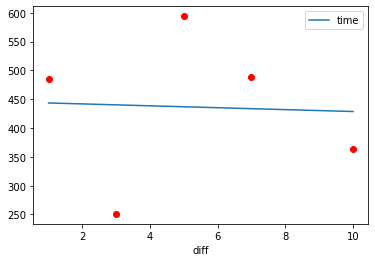

In [35]:
newdf
newdf.plot(x = 'diff', y = 'time')

# scatter plot with predictions in blue and data in red
ax = plt.subplot(1, 1, 1)
ax.scatter(df['diff'], df['time'], color = "red")

In [41]:
from patsy import dmatrix
# import statsmodels.api as sm
# Fit a more flexible model
diff_cubic = dmatrix('bs(x, knots=())', {'x': df['diff']})
result_cubic = sm.GLM(df['time'], diff_cubic).fit()

<ipython-input-42-0ca5dc8ae0b8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1, 1, 1)


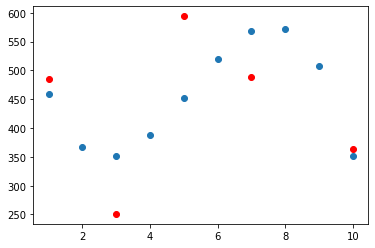

In [42]:
newdiff_cubic = dmatrix('bs(x, knots=())', {'x': newdf['diff']})


plt.figure()
plt.scatter(x = newdf['diff'], y = result_cubic.predict(newdiff_cubic))

ax = plt.subplot(1, 1, 1)
ax.scatter(df['diff'], df['time'], color = "red")

In [46]:
result = sm.ols(formula="time ~ type", data=df).fit()
print(result.params)
result = sm.ols(formula="time ~ type + diff", data=df).fit()
print(result.params)

Intercept        368.0
type[T.Latin]    171.5
dtype: float64
Intercept        230.448980
type[T.Latin]    247.153061
diff              20.632653
dtype: float64


In [44]:
# Spam detection (example)

df = pd.read_csv('SMSSpamCollection.txt', delimiter = "\t", names=['s','t'])
df.head(4)

,s,t
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [167]:
list(df)

['s', 't']

In [168]:
#  To generate the length of the text message and the lenght of the first group of uppercase letters
import re
df['l'] = df['t'].str.len()
df['f'] = df.t.str.extract('([A-Z_]+)')
df['fl'] = df['f'].str.len()
df2 = df.t.str.extractall('([A-Z_]+)')

In [169]:
df3.index.names = ['name', 'yes']

In [170]:
df2.index.names = ['text','no']
df2


0
text no   
0    0   G
     1   A
     2   C
1    0   O
     1   J
...     ..
5569 1   S
5570 0   T
     1   I
5571 0   R
     1   I

[19324 rows x 1 columns]

In [171]:
df['uc'] = df2.groupby(level=[0]).sum()
df['ucl'] = df['uc'].str.len()

In [172]:
list(df)

['s', 't', 'l', 'f', 'fl', 'uc', 'ucl']

In [173]:
df['ucr'] = df['ucl'].div(df['l'])
df[['ucr', 'ucl', 'l']]

,ucr,ucl,l
0,0.027027,3.0,111
1,0.068966,2.0,29
2,0.064516,10.0,155
3,0.040816,2.0,49
4,0.032787,2.0,61
...,...,...,...
5567,0.056250,9.0,160
5568,0.027778,1.0,36
5569,0.035088,2.0,57
5570,0.016000,2.0,125


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

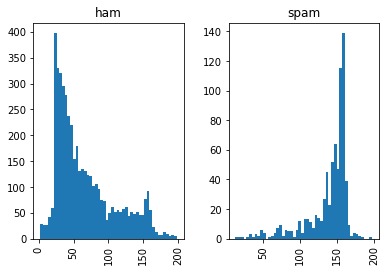

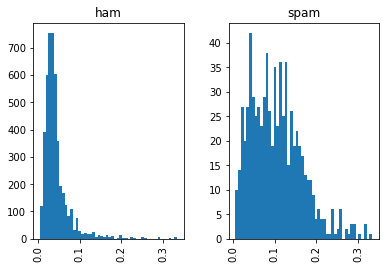

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline
df[df.l < 200].hist(column = 'l', bins = 50, by = 's')
df[df.ucr < .35].hist(column = 'ucr', bins = 50, by = 's')

In [52]:
# TASK 3
# Find other features that may be predictive of spam (for instance, as indicated by histograms)
# Finding most frequent words used in spam and ham using wordcloud lib

from wordcloud import WordCloud

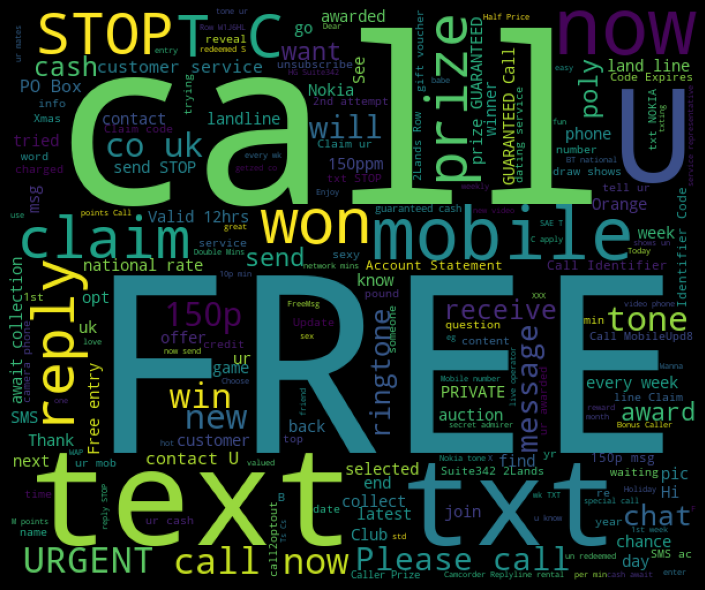

In [53]:
# Checking most repeated words in the spam and in ham messages.
#  using WordCloud library 
sp_words = ' '.join(list(df[df['s'] == 'spam']['t']))
spam = WordCloud(width = 600, height = 500).generate(sp_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()
# From the graph we see the most frequen word in the spam is 'FREE' and secondly 'call'.
# Other more frequent words in the spam includes: text, mobile replay, stop , urgent, claim, prize, now, won, please call, etc.

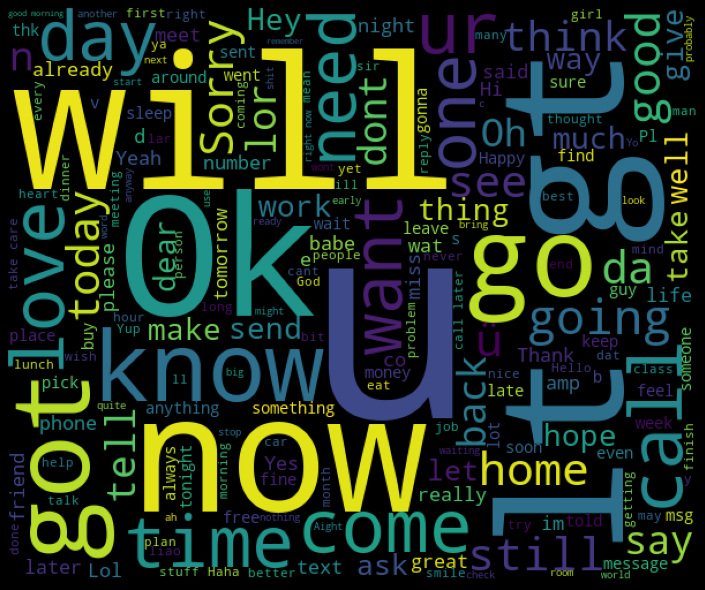

In [55]:
# for ham words let's make figere using the wordcloud
ham_words = ' '.join(list(df[df['s'] == 'ham']['t']))
ham = WordCloud(width = 600, height = 500).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()
# where as the most frequent word in the ham(not spam) massages is 'will'. 
# Other most frequent words among others: ok, go, love, know, want call, good, time, day, one, etc. 